---

## **Abstract**

Customer churn metric represents one of the key performance indicators for most present-day companies and is a significant business concern. The loss of customers directly impacts the margins and profitability of organizations. That's why analyzing customer churn is extremely important.

In the following notebook, we will work with a database of customers from a bank who have churned from the organization. From these churned customers, we will learn what patterns they have in common for leaving the business. Once we understand these patterns, we will work on a machine learning model to predict if current customers are at risk of churning from the company, allowing us to take measures to prevent it.

Furthermore, we will understand what factors influence churn and can take steps to improve service quality and retention of current and future customers.

### **1. Objective**

To understand the characteristics of customers who have churned from the bank and reduce churn in current and future customers.

### **2. Business Context**

Reducing the churn rate will directly impact the profitability of the business. On the other hand, it will improve the image for future and current customers, which will help in retention and reducing the churn rate.

### **3. Business Problem (Hypotheses)**

1. If a customer has complained about the service, the likelihood of churn increases.
2. Customers in Germany are more likely to churn from the bank.
3. Customers aged 35 to 55 tend to churn from the bank more frequently.
4. Customers with only one bank product tend to churn from the bank more than those who do not.
5. If the customer is not an active member, they tend to churn from the company.
6. Depending on the customer's tenure, there is more or less churn.

### **4. Analytical Context**


Variables:

1. RowNumber: Row index number.
2. CustomerID: Unique customer identifier.
3. Surname: Customer's surname.
4. CreditScore: Customer's credit score ranging from 350 to 850 points.
5. Geography: Customer's country.
6. Gender: Female or Male gender.
7. Tenure: Time the customer has been with the bank.
8. Balance: Account balance.
9. Num Of Products: Number of products contracted by each customer.
10. HasCrCard: 1 if they have a credit card, 0 if they don't.
11. IsActiveMember: 1 if the member is active, 0 if inactive.
12. EstimatedSalary: Customer's estimated annual salary.
13. Exited: 1 if they have churned from the bank, 0 if they are still a customer.
14. Complain: 1 if they have complained, 0 if they haven't.
15. Satisfaction Score: Numeric value of customer satisfaction.
16. Card Type: Diamond, Gold, Silver card type.
17. Points Earned: Points earned within the bank.

### 5. Explore Analysis and Data Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customer-Churn-Records.csv')
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
customers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
customers[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


In [83]:
customer_churn[["Exited", "Complain", "IsActiveMember", "HasCrCard"]] = customer_churn[["Exited", "Complain", "IsActiveMember", "HasCrCard"]].replace({ 1: "Yes", 0:"No"})
print(customer_churn.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0       2       0.00              1       Yes            Yes        101348.88   
1       1   83807.86              1        No            Yes        112542.58   
2       8  159660.80              3       Yes             No        113931.57   
3       1       0.00              2        No             No         93826.63   
4       2  125510.82              1       Yes            Yes         79084.10   

  Exited Complain  Satisfaction Score Card Type  Point Earned  
0   

In [6]:
customers['Exited'].value_counts(normalize=True)

0    0.7962
1    0.2038
Name: Exited, dtype: float64

#### a. Exited Clients

There's 20% of current clients that have exited, this doesn't alling withe industry average.

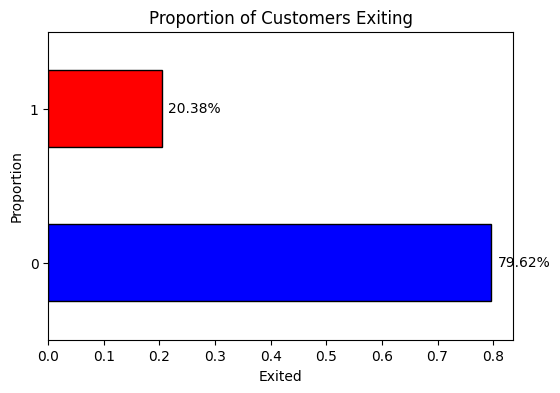

In [7]:
ax = customers['Exited'].value_counts(normalize=True).plot(kind='barh', color=['blue', 'red'], edgecolor='black', figsize=(6,4))

plt.title('Proportion of Customers Exiting')
plt.xlabel('Exited')
plt.ylabel('Proportion')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2%}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()


In [11]:
customers_still = customers[customers['Exited']==0]
churned = customers[customers['Exited']==1]

#### b. Geography Observation

We can notice that the number of churned clients in Germany, in proportion, is higher than those in Spain and France. In numbers:

- France     16.17%
- Germany    32.44%
- Spain      16.67%

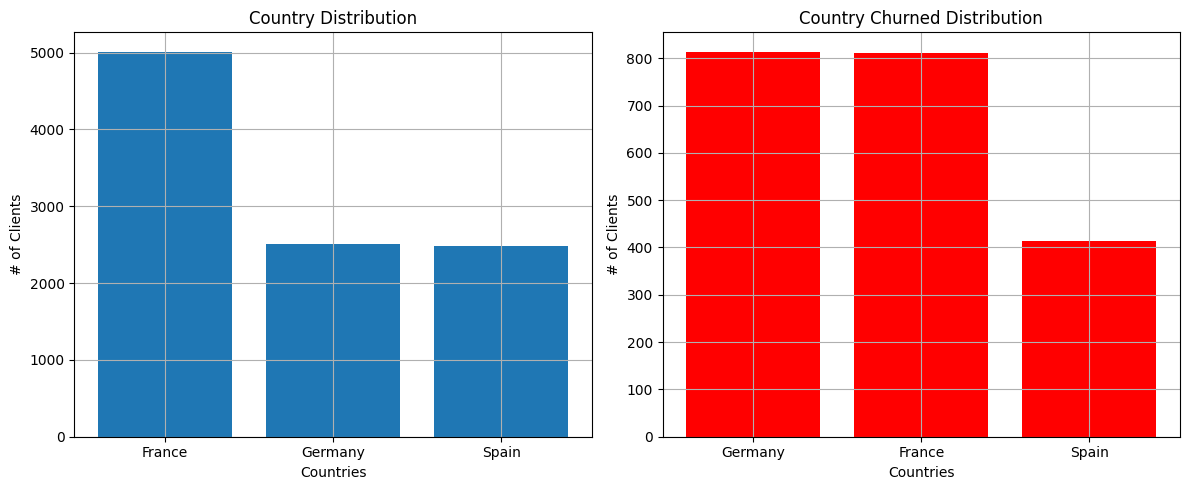

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

geo = customers['Geography'].value_counts()
ax1.bar(geo.index, geo.values)
ax1.set_title('Country Distribution')
ax1.set_xlabel('Countries')
ax1.set_ylabel('# of Clients')
ax1.grid(True)


geo_churn = churn['Geography'].value_counts()
ax2.bar(geo_churn.index, geo_churn.values, color='red')
ax2.set_title('Country Churned Distribution')
ax2.set_xlabel('Countries')
ax2.set_ylabel('# of Clients')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [35]:
exited_c = geo_churn / geo

exited_c

France     0.161747
Germany    0.324432
Spain      0.166734
Name: Geography, dtype: float64

#### c. Demographic Analysis

The charts below show higher droput rate for women than men.

- Female    25.07%
- Male      16.47%

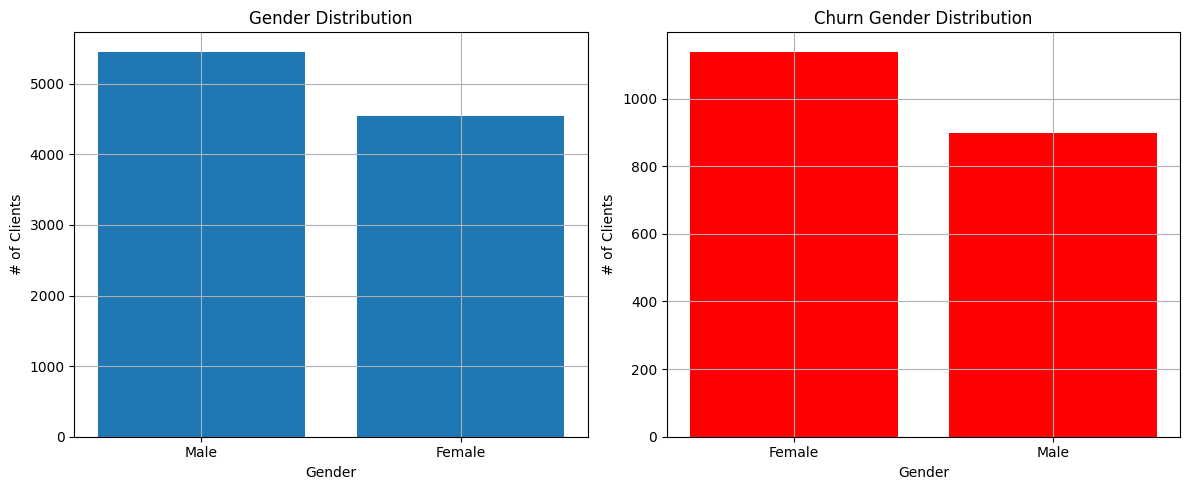

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

gender = customers['Gender'].value_counts()
ax1.bar(gender.index, gender.values)
ax1.set_title('Gender Distribution')
ax1.set_xlabel('Gender')
plt.xticks(rotation=0)
ax1.set_ylabel('# of Clients')
ax1.grid('True')

churn_gender = churn['Gender'].value_counts()
ax2.bar(churn_gender.index, churn_gender.values, color='red')
ax2.set_title('Churn Gender Distribution')
ax2.set_xlabel('Gender')
plt.xticks(rotation=0)
ax2.set_ylabel('# of Clients')
ax2.grid('True')

plt.tight_layout()
plt.show()

In [36]:
print(churn_gender/gender)

Female    0.250715
Male      0.164743
Name: Gender, dtype: float64


#### e. Demographic Analysis (age)

In the graphs below, we can observe a clear trend indicating that individuals of older age groups have disengaged from our company.

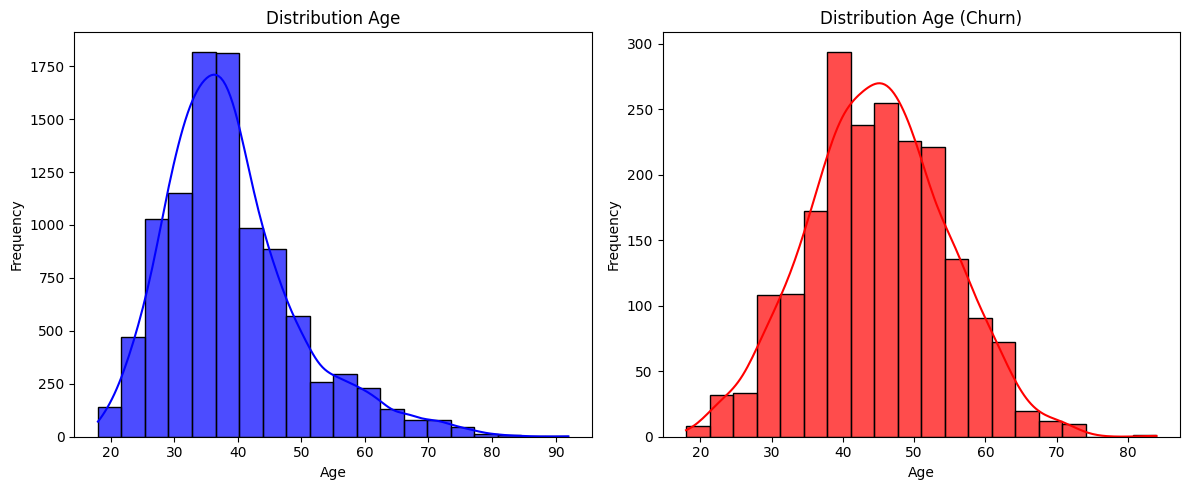

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.histplot(customers['Age'], bins=20, color='blue', alpha=0.7, kde=True, ax=ax1)
ax1.set_title('Distribution Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')


sns.histplot(churn['Age'], bins=20, color='red', alpha=0.7, kde=True, ax=ax2)
ax2.set_title('Distribution Age (Churn)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

#### d. Tenure

In terms of tenure we don't see a clear trend

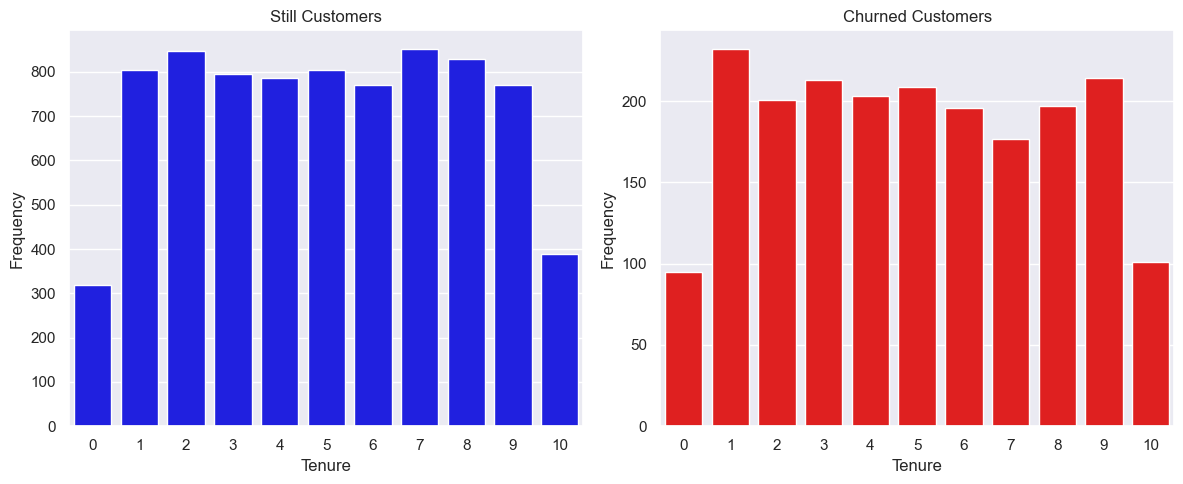

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(customers_still, x='Tenure', color='blue')
plt.title('Still Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(churned, x='Tenure', color='red')
plt.title('Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

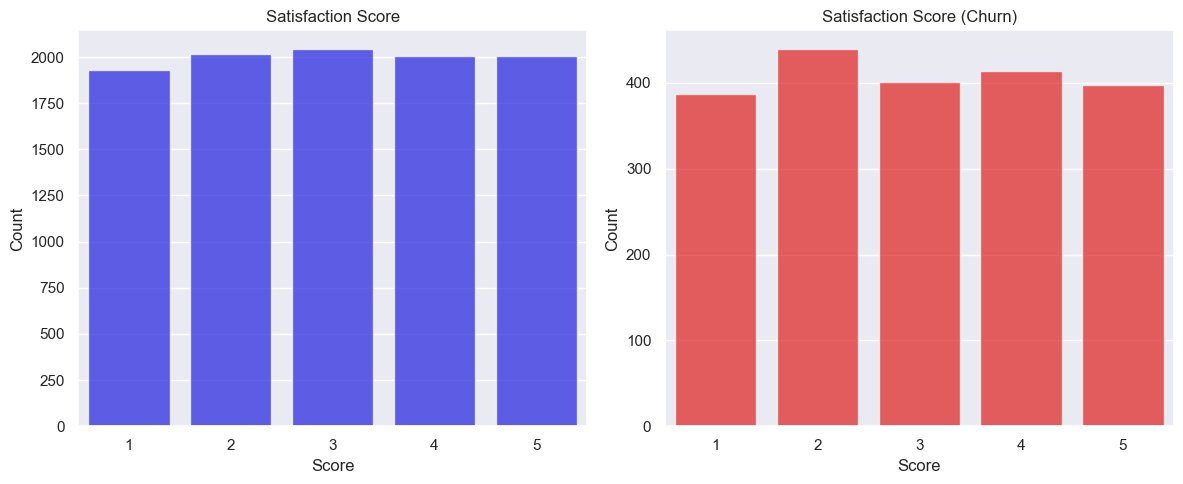

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=customers, x='Satisfaction Score', color='blue', alpha=0.7, ax=ax1)
ax1.set_title('Satisfaction Score')
ax1.set_xlabel('Score')
ax1.set_ylabel('Count')


sns.countplot(data=churn, x='Satisfaction Score', color='red', alpha=0.7, ax=ax2)
ax2.set_title('Satisfaction Score (Churn)')
ax2.set_xlabel('Score')
ax2.set_ylabel('Count')


plt.tight_layout()
plt.show()

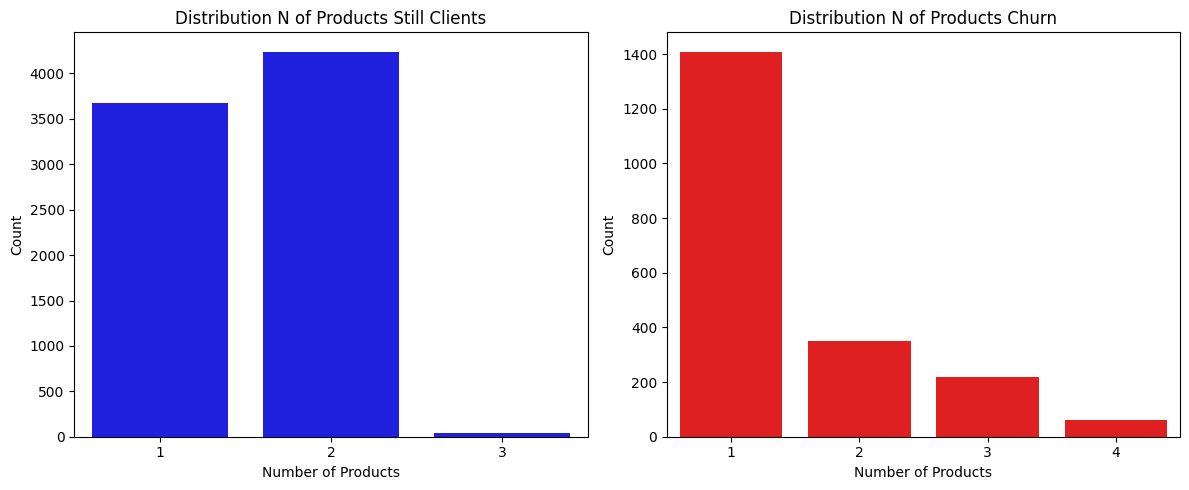

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(data=customers_still, x='NumOfProducts', ax=ax1, color='blue')
ax1.set_xlabel('Number of Products')
ax1.set_ylabel('Count')
ax1.set_title('Distribution N of Products Still Clients')

sns.countplot(data=churn, x='NumOfProducts', ax=ax2, color='red')
ax2.set_xlabel('Number of Products')
ax2.set_ylabel('Count')
ax2.set_title('Distribution N of Products Churn')

plt.tight_layout()
plt.show()

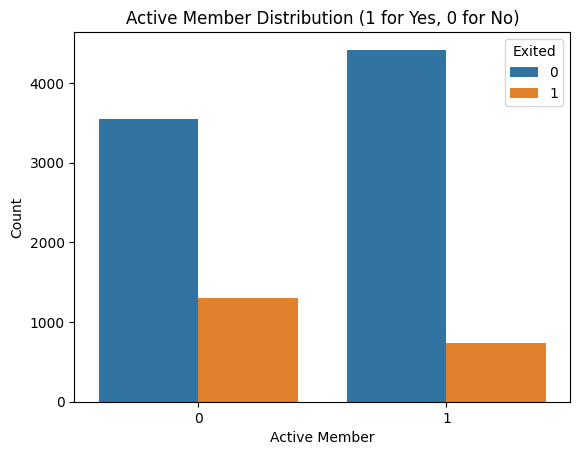

In [25]:
fig, ax= figsize=(12,5)

ax = sns.countplot(data=customers, x='IsActiveMember', hue='Exited')
ax.set_xlabel('Active Member')
ax.set_ylabel('Count')
ax.set_title('Active Member Distribution (1 for Yes, 0 for No)')

plt.show()

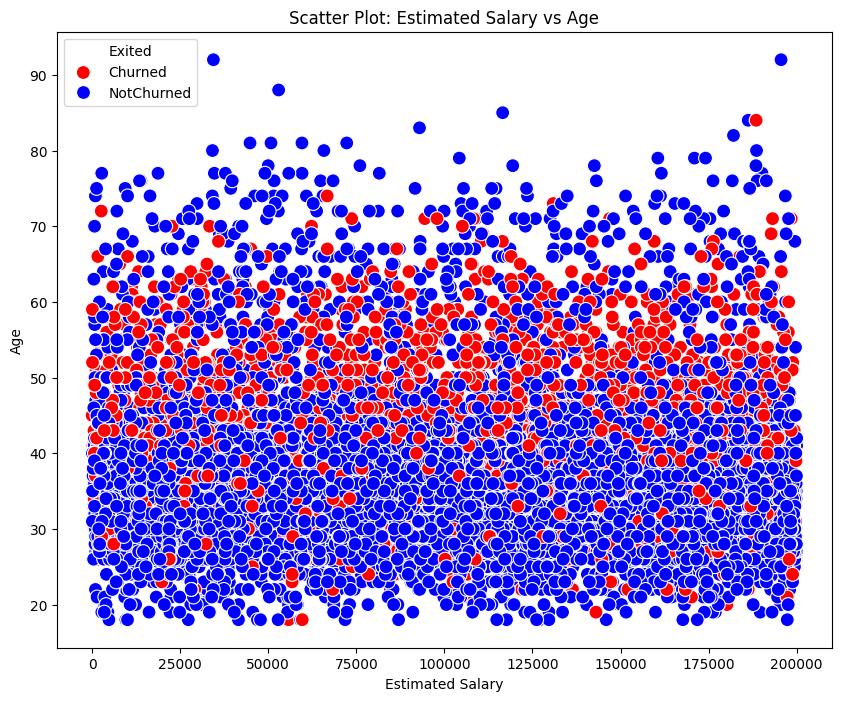

In [26]:
palette = {0: 'blue', 1: 'red'}
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customers, x='EstimatedSalary', y='Age', hue='Exited', palette=palette, s=100)

plt.legend(title='Exited', labels=['Churned', 'NotChurned'])

plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.title('Scatter Plot: Estimated Salary vs Age')

plt.show()

In [27]:
new_customers = customers.drop(columns=['RowNumber', 'Surname', 'Balance', 'CustomerId'] )
new_customers

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,France,Male,35,10,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,France,Female,36,7,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Germany,Male,42,3,2,1,0,92888.52,1,1,2,GOLD,339


In [29]:
new_customers = pd.get_dummies(new_customers)
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  uint8  
 13  Geography_Germany   10000 non-null  uint8  
 14  Geography_Spain     10000 non-null  uint8  
 15  Gender_Female       10000 non-null  uint8  
 16  Gende

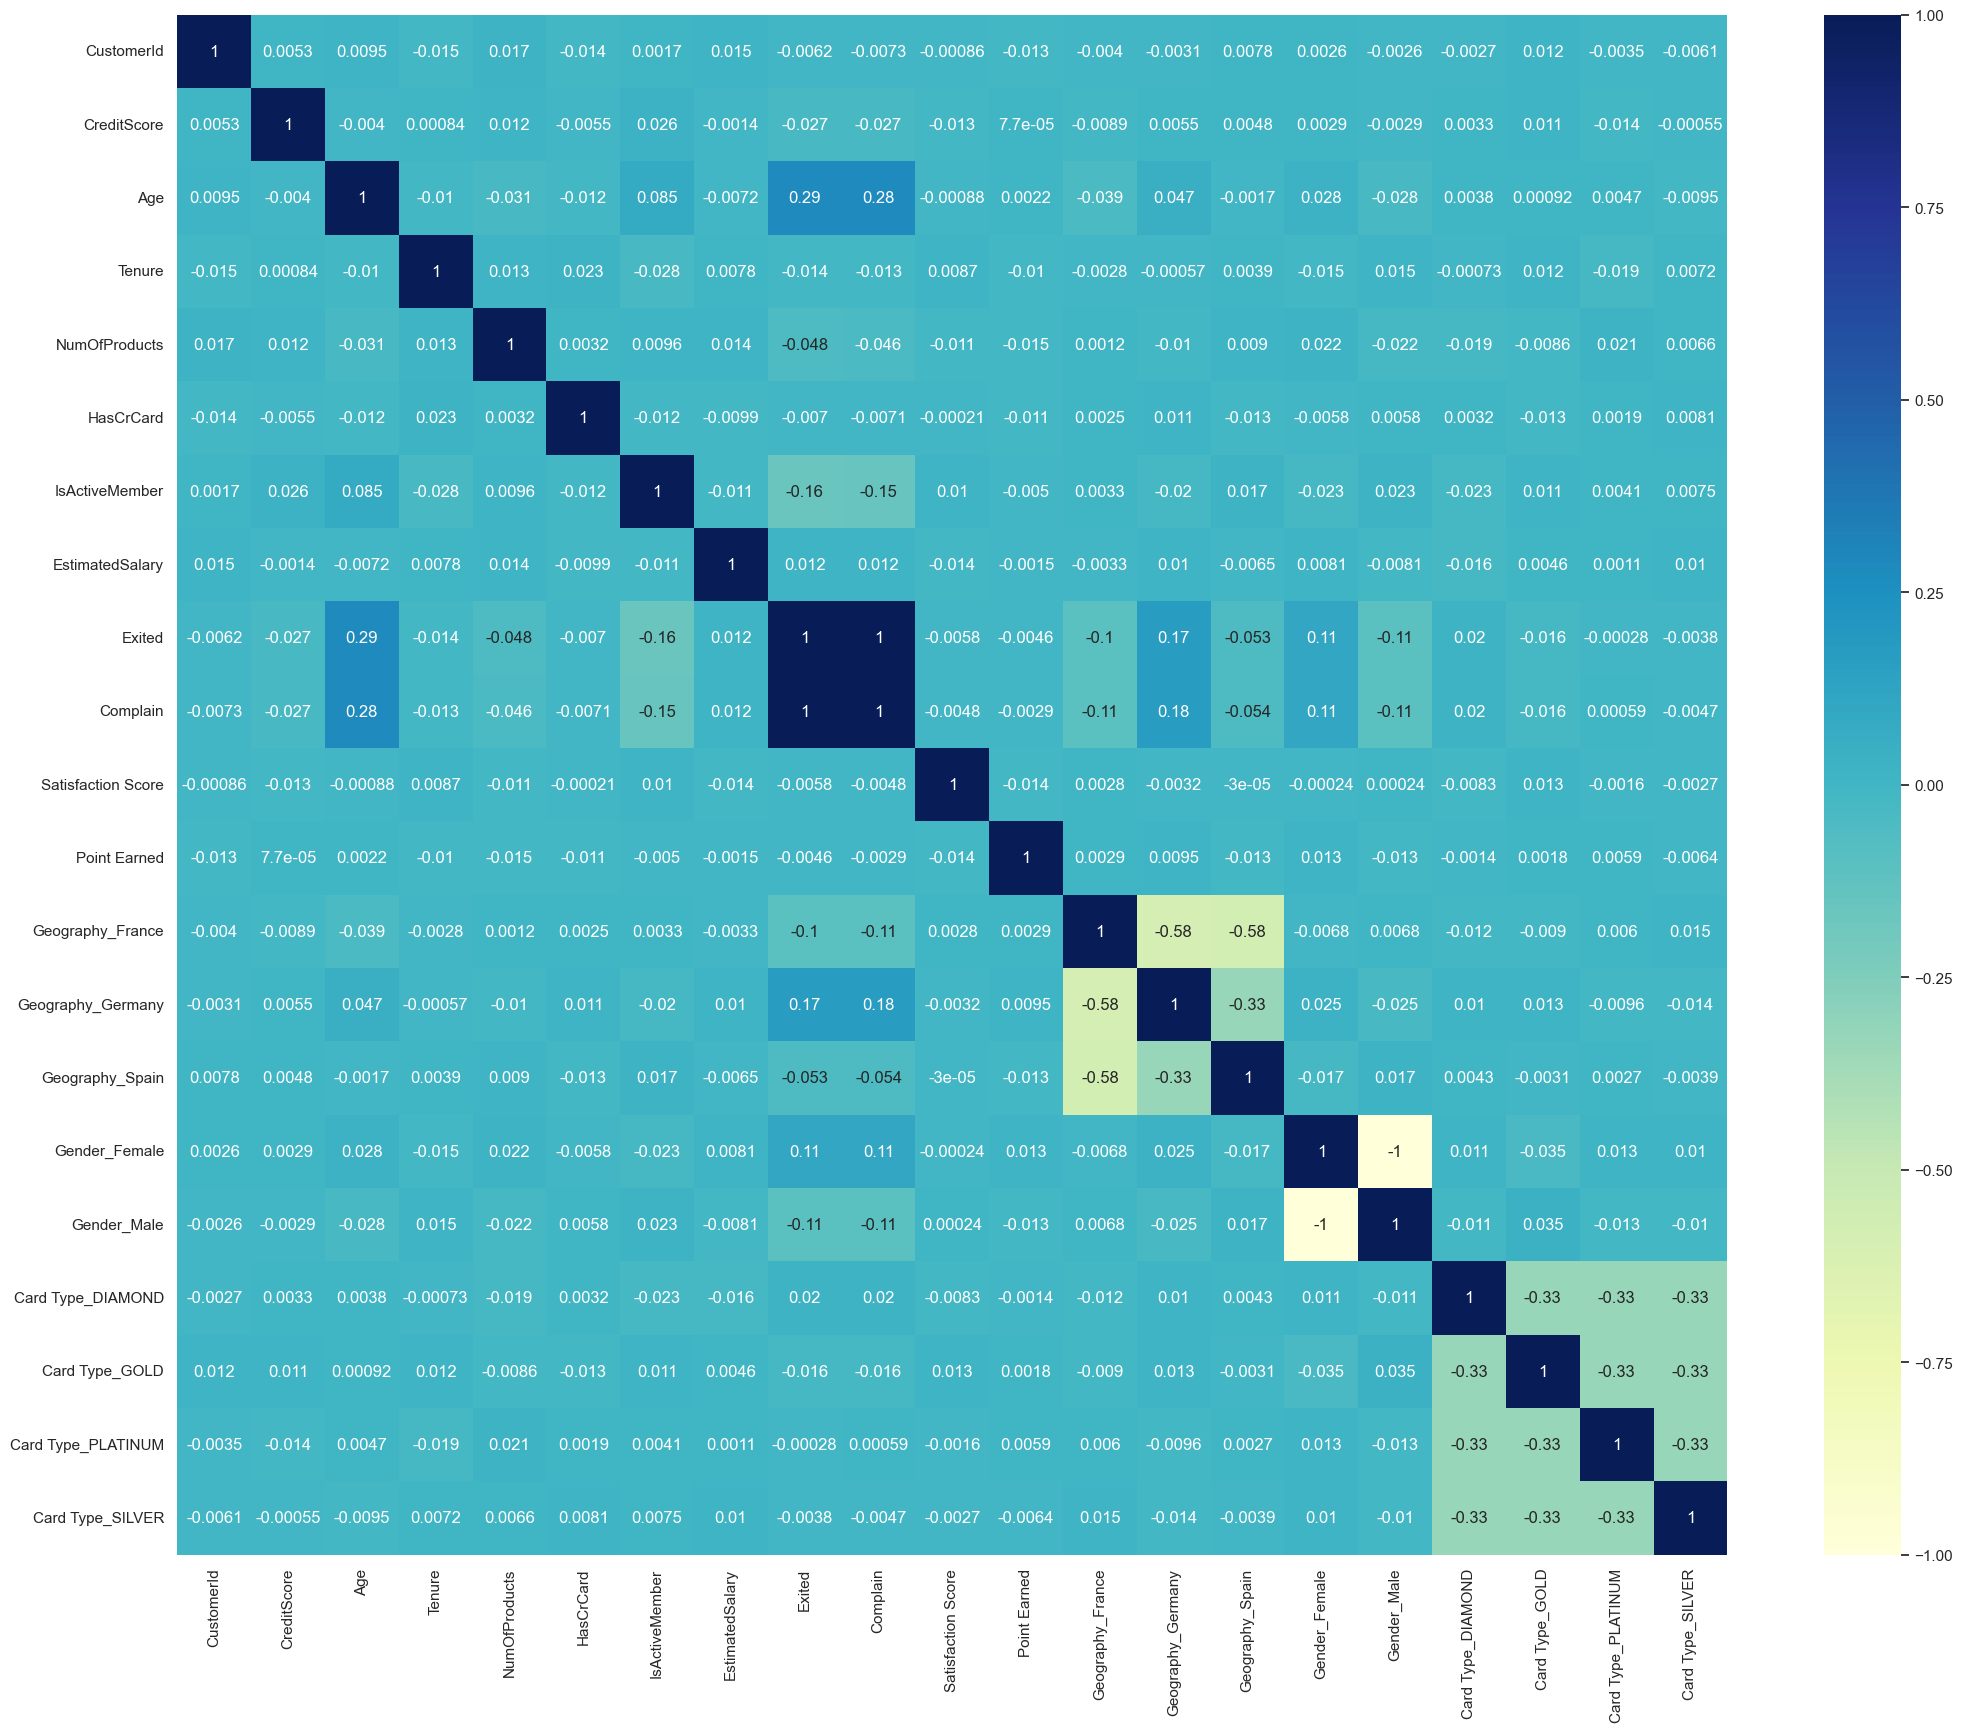

In [31]:
sns.heatmap(new_customers.corr(numeric_only=True), cmap='YlGnBu', annot=True)
sns.set(rc = {'figure.figsize': (25,25)})

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X = new_customers[['Age', 'IsActiveMember', 'Gender_Male', 'Gender_Female', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Complain']]
y = new_customers['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5)

print("Accuracy on the test set:", accuracy)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Accuracy on the test set: 0.9725
Cross-Validation Scores: [0.960625 0.9625   0.95875  0.9575   0.96375 ]
Mean Accuracy: 0.960625



### 6. **Recomendaciones**

Based on the exploratory data analysis, we have identified a concerning churn rate exceeding 20%. It is imperative to take measures to address this issue and retain our customers. Additionally, we have developed a model that allows us to predict the churn risk in our current customer database, providing us with a valuable tool for making informed decisions.

To address the challenge of increasing member activity in the age range of 35 to 45 years, we could consider creating specific products or services designed to attract this demographic group. This strategy could help us increase retention and engagement of customers in this segment.

Regarding our operation in Germany, it is crucial to conduct a detailed review to ensure that the quality of our services and products is consistent with the standards we offer in other countries. Any deviation could be the cause of the churn problem in that market.

Furthermore, we must address the engagement rate overall. To do this, it is recommended to use marketing tools that highlight our unique or superior products and services compared to the competition. This will help strengthen the relationship with our customers and improve their retention.

Finally, a critical point to consider is tracking customers who raise complaints. It seems that this group is more likely to churn. Therefore, it is advisable to implement an active tracking system, make follow-up calls, and effectively address the issues raised by these customers. This can not only help retain these dissatisfied customers but also improve our overall reputation and customer satisfaction.

In summary, it is essential to address the churn issue, improve customer retention in the 35 to 45 age group, review operations in Germany, effectively promote our products and services, and provide special follow-up to customers who raise complaints. These combined actions can significantly contribute to customer retention and the continued success of our company.

In [3]:
!jupyter nbconvert --to script 'customer_churn_project.ipynb'



[NbConvertApp] WARNING | pattern 'customer_churn_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--